# Explanation:

The target variable is: 

amount_new_house_transactions: The total monetary value of new house transactions in 10,000 yuan.

We are using some of the features found in the different csv's to predict the final amount
The method used is XGBoost with cross validation

# Setup

## Dependencies and plotting style

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import sklearn
import xgboost as xgb

from sklearn.metrics import mean_squared_error, mean_absolute_error
from pathlib import Path

In [2]:
# Set global plot styles
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Dataloading part of the notebook

In [3]:
# Define the data path
DATA_PATH = Path("/Users/nikola/Python/KaggleCompetition/data")

# Load the new house transactions data
new_house_df = pd.read_csv(DATA_PATH / "train" / "new_house_transactions.csv")

setting year as index

In [4]:
# Convert to datetime
new_house_df['month'] = pd.to_datetime(new_house_df['month'], format='%Y-%b')

# Set year as index
new_house_df.index = new_house_df['month'].dt.year
new_house_df.index.name = 'year'

# # Keep only month name in the column
# new_house_df['month'] = new_house_df['month'].dt.strftime('%b')

## Setting the output paths and folders and creating standardized output

In [ ]:
# # Defining the output paths
# OUTPUT_PATH = Path("/Users/nikola/Python/KaggleCompetition/output")
# IMAGES_PATH = OUTPUT_PATH / "images"
# SUBMISSION_PATH = OUTPUT_PATH / "submissions"

# # Create directories if they don't exist
# OUTPUT_PATH.mkdir(parents=True, exist_ok=True)
# IMAGES_PATH.mkdir(parents=True, exist_ok=True)
# SUBMISSION_PATH.mkdir(parents=True, exist_ok=True)

# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     """Save a matplotlib figure to the images folder"""
#     path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)
#     print(f"Figure saved: {path}")

# def save_submission(df, name="submission"):
#     """Save a DataFrame as CSV for Kaggle submission"""
#     from datetime import datetime
#     timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
#     filename = f"{name}_{timestamp}.csv"
#     path = SUBMISSION_PATH / filename
#     df.to_csv(path, index=False)
#     print(f"Submission saved: {path}")
#     return path

# Data exploration
Scatterplot to see the distribution of the data

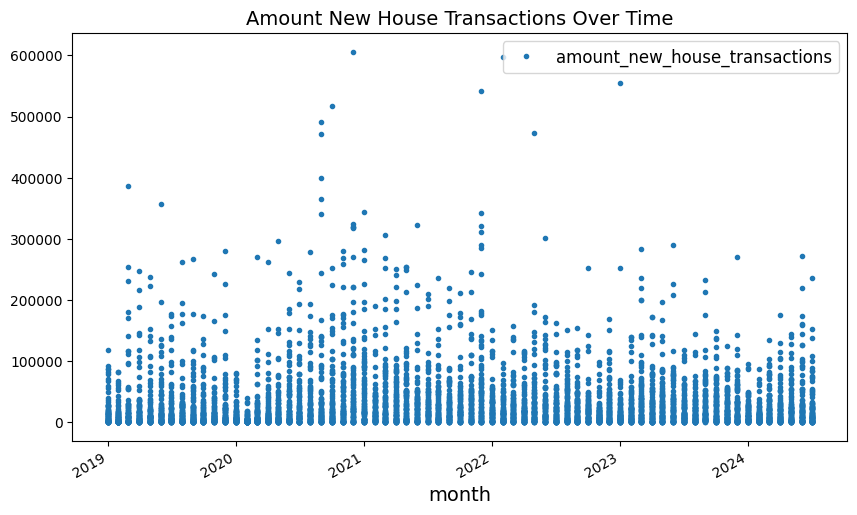

In [5]:
new_house_df.plot(y='amount_new_house_transactions',
                  x= 'month',
                  style='.',
                  figsize=(10, 6),
                  title='Amount New House Transactions Over Time')
        
plt.show()

<Axes: ylabel='Frequency'>

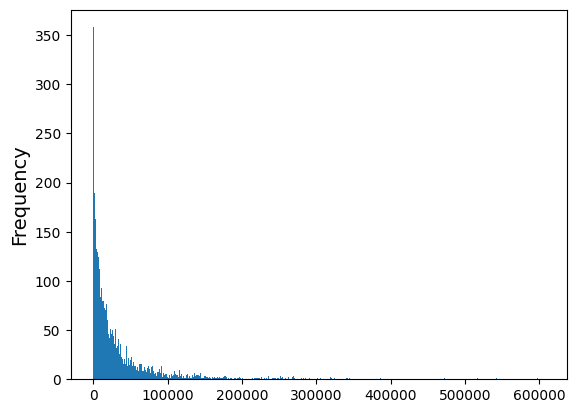

In [6]:
new_house_df['amount_new_house_transactions'].plot(kind='hist', bins=800)

# This is where the fun begins

# Error Metrics

In [ ]:
mean_squared_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst['yhat'])

In [ ]:
mean_absolute_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst['yhat'])

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst['yhat'])